# Data Cleaning By filling Values with Central Tendency Measuring
### Mean, Median and Mode

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DataSets/house-prices-advanced-regression-techniques/train.csv')
df.head(4)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000


In [ ]:
df.shape


(1460, 81)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [ ]:
percentage = df.isnull().sum() / len(df)*100


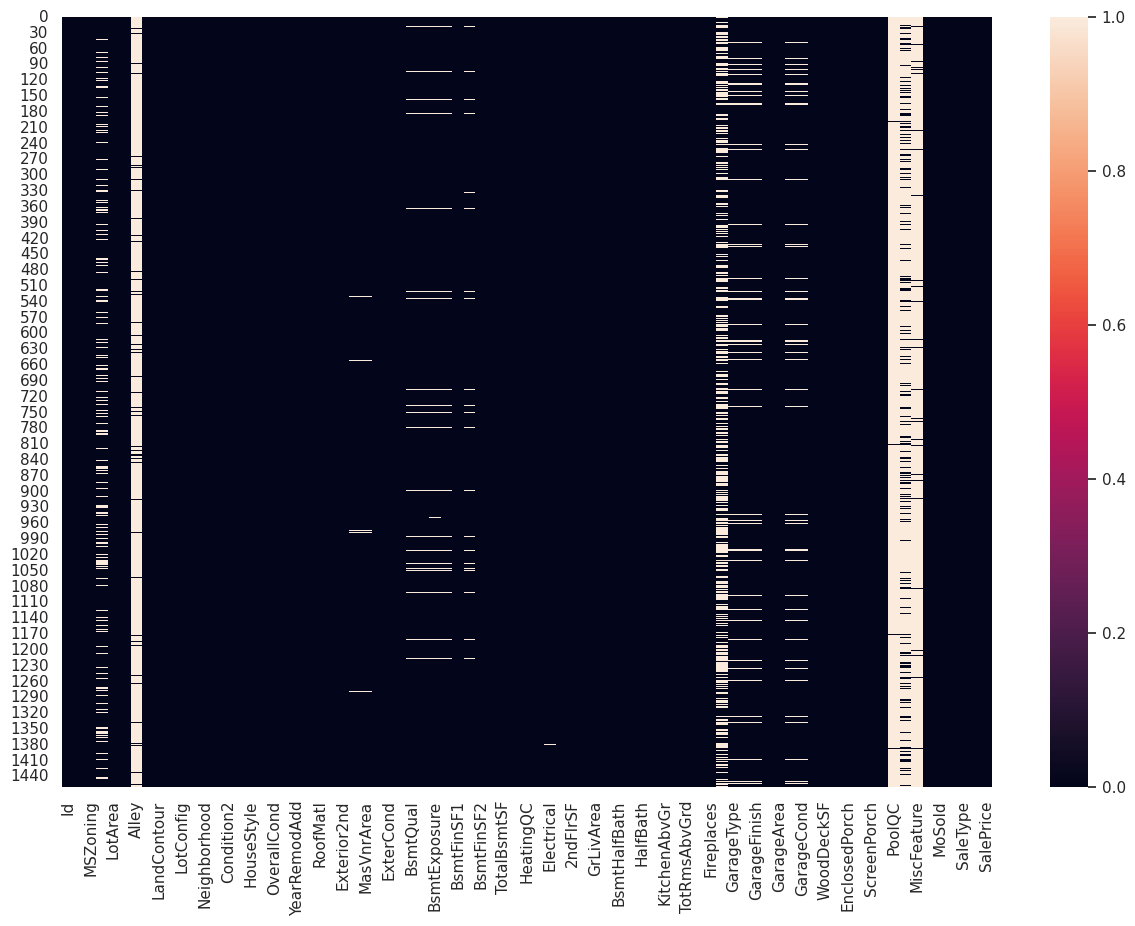

In [ ]:
plt.figure(figsize= (15,10))
sb.heatmap(df.isnull())
plt.show()

In [ ]:
# Deleting Those Features which have more than 90% error values
high_null = percentage[percentage>20].keys()
high_null

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [ ]:
new_df=df.drop(columns = high_null)
new_df.shape

(1460, 76)

In [ ]:
new_df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500


In [ ]:
new_df.isnull().sum() *100 /len(df)

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
BsmtUnfSF         0.000000
T

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

# Handling Null values

In [ ]:
# Selecting Numerical values
df_num = new_df.select_dtypes(include =['int64','float64'])
df_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [ ]:
#Finding Feature which has numerical type dataset with having Null values
df_miss_num = [ values for values in df_num.columns if df_num[values].isnull().sum() > 0]
df_miss_num


['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

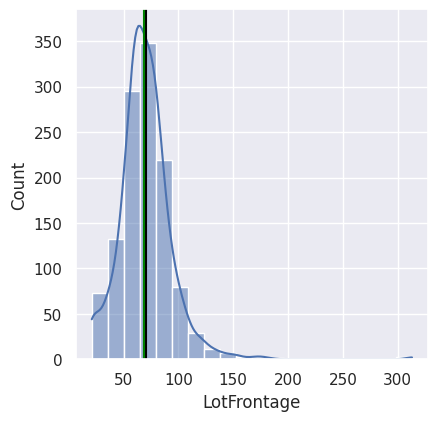

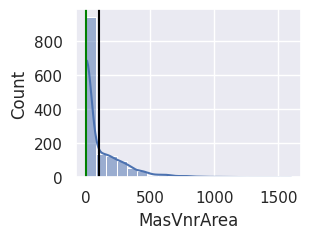

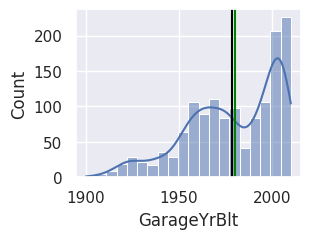

In [ ]:
#Decision for null value handling by Visualization
plt.figure(figsize=(10,10))
sb.set_theme()

for i,var in enumerate(df_miss_num):
  plt.subplot(2,2,i+1)
  sb.histplot(new_df[var],kde = True,bins = 20)
  plt.axvline(new_df[var].mean(),color = 'black')
  plt.axvline(new_df[var].median(),color = 'green')
  plt.show()





In [ ]:
new_df_mean = new_df.fillna(new_df.mean())
new_df_median = new_df.fillna(new_df.median())
new_df_mean.isnull().sum() *100 /len(new_df_mean)


<ipython-input-63-dc6fa4074f43>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_df_mean = new_df.fillna(new_df.mean())
<ipython-input-63-dc6fa4074f43>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_df_median = new_df.fillna(new_df.median())


Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.000000
LotArea          0.000000
Street           0.000000
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.547945
MasVnrArea       0.000000
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinSF1       0.000000
BsmtFinType2     2.602740
BsmtFinSF2       0.000000
BsmtUnfSF        0.000000
TotalBsmtSF      0.000000
Heating     

In [ ]:
new_df_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [ ]:
new_df_mean = new_df_mean.dropna()


In [ ]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()


In [ ]:
for i,value in enumerate(new_df_mean):
  if new_df_mean[value].dtypes == object:
    new_df_mean[value]=lb.fit_transform(new_df_mean[value])
new_df_mean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1338 non-null   int64  
 1   MSSubClass     1338 non-null   int64  
 2   MSZoning       1338 non-null   int64  
 3   LotFrontage    1338 non-null   float64
 4   LotArea        1338 non-null   int64  
 5   Street         1338 non-null   int64  
 6   LotShape       1338 non-null   int64  
 7   LandContour    1338 non-null   int64  
 8   Utilities      1338 non-null   int64  
 9   LotConfig      1338 non-null   int64  
 10  LandSlope      1338 non-null   int64  
 11  Neighborhood   1338 non-null   int64  
 12  Condition1     1338 non-null   int64  
 13  Condition2     1338 non-null   int64  
 14  BldgType       1338 non-null   int64  
 15  HouseStyle     1338 non-null   int64  
 16  OverallQual    1338 non-null   int64  
 17  OverallCond    1338 non-null   int64  
 18  YearBuil

<Axes: >

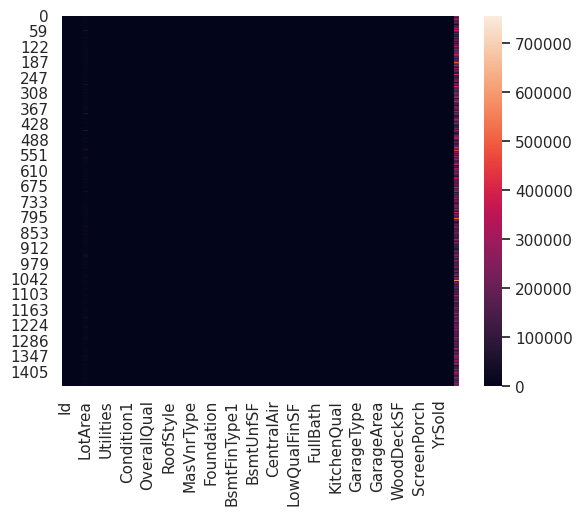

In [ ]:
sb.heatmap(new_df_mean)

In [ ]:
new_df_mean.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,11,13,1,196.0,2,3,2,2,3,3,2,706,5,0,150,856,0,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,1,2003.0,1,2,548,4,4,2,0,61,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,7,8,2,0.0,3,3,1,2,3,1,0,978,5,0,284,1262,0,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,1,1976.0,1,2,460,4,4,2,298,0,0,0,0,0,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,11,13,1,162.0,2,3,2,2,3,2,2,486,5,0,434,920,0,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,1,2001.0,1,2,608,4,4,2,0,42,0,0,0,0,0,9,2008,8,4,223500


In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
new_df_fit = mms.fit_transform(new_df_mean)
new_df_fit = pd.DataFrame(new_df_fit,columns = new_df_mean.columns)
new_df_fit.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.000000,0.235294,0.75,0.150685,0.033420,1.0,1.0,1.0,0.0,1.0,0.0,0.208333,0.250,0.285714,0.0,0.714286,0.625,0.428571,0.946154,0.883333,0.2,0.142857,0.846154,0.866667,0.333333,0.12250,0.666667,1.0,0.50,0.666667,1.0,1.000000,0.4,0.125089,1.0,0.0,0.064212,0.125062,0.0,0.0,1.0,1.0,0.098260,0.413559,0.0,0.244427,0.5,0.0,0.666667,0.5,0.5,0.0,0.666667,0.555556,1.0,0.000000,0.2,0.936364,0.5,0.333333,0.308426,1.0,1.0,1.0,0.000000,0.111517,0.0,0.0,0.0,0.0,0.0,0.090909,0.50,1.0,0.8,0.240644
1,0.000685,0.000000,0.75,0.202055,0.038795,1.0,1.0,1.0,0.0,0.5,0.0,1.000000,0.125,0.285714,0.0,0.285714,0.500,0.857143,0.738462,0.433333,0.2,0.142857,0.538462,0.533333,0.666667,0.00000,1.000000,1.0,0.25,0.666667,1.0,0.333333,0.0,0.173281,1.0,0.0,0.121575,0.192673,0.0,0.0,1.0,1.0,0.193700,0.000000,0.0,0.158340,0.0,0.5,0.666667,0.0,0.5,0.0,1.000000,0.333333,1.0,0.333333,0.2,0.690909,0.5,0.333333,0.238474,1.0,1.0,1.0,0.347725,0.000000,0.0,0.0,0.0,0.0,0.0,0.363636,0.25,1.0,0.8,0.203128
2,0.001371,0.235294,0.75,0.160959,0.046507,1.0,0.0,1.0,0.0,1.0,0.0,0.208333,0.250,0.285714,0.0,0.714286,0.625,0.428571,0.930769,0.866667,0.2,0.142857,0.846154,0.866667,0.333333,0.10125,0.666667,1.0,0.50,0.666667,1.0,0.666667,0.4,0.086109,1.0,0.0,0.185788,0.135720,0.0,0.0,1.0,1.0,0.113305,0.419370,0.0,0.259032,0.5,0.0,0.666667,0.5,0.5,0.0,0.666667,0.333333,1.0,0.333333,0.2,0.918182,0.5,0.333333,0.356121,1.0,1.0,1.0,0.000000,0.076782,0.0,0.0,0.0,0.0,0.0,0.727273,0.50,1.0,0.8,0.261487


In [ ]:
x = new_df_fit.drop(columns = ['SalePrice',"Id"])
y = new_df_fit.SalePrice


In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(new_df_fit,y,test_size = 0.2)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(xtrain,ytrain)
y_prediction = lr.predict(xtest)
lr.score(xtest,ytest) * 100

100.0